In [1]:
import os
import torch
import torchvision
import torchvision.transforms as transforms
import torch.optim as optim
import torch.nn as nn
from torchvision.models.inception import InceptionOutputs
from torch.optim import lr_scheduler
from torch.utils.data import DataLoader
from torchvision import datasets

In [2]:
class CustomInceptionV3(torch.nn.Module):
    def __init__(self, num_classes=1000, aux_logits=True):
        super(CustomInceptionV3, self).__init__()
        self.inception = torchvision.models.inception_v3(pretrained=False, aux_logits=aux_logits)
        num_ftrs = self.inception.fc.in_features
        self.inception.fc = torch.nn.Linear(num_ftrs, num_classes)

    def forward(self, x):
        return self.inception(x)

In [3]:
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(299),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ]),
    'val': transforms.Compose([
        transforms.Resize(299),
        transforms.CenterCrop(299),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ]),
}

In [4]:
data_dir = 'C:/Users/20109/OneDrive/Desktop/New-Coach/data'
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x), data_transforms[x]) for x in ['train', 'val']}
dataloaders = {x: DataLoader(image_datasets[x], batch_size=32, shuffle=True, num_workers=4) for x in ['train', 'val']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
class_names = image_datasets['train'].classes

In [5]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = CustomInceptionV3(num_classes=2)
model = model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

c:\Users\20109\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\20109\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
c:\Users\20109\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\inception.py:43: FutureWarning: The default weight initialization of inception_v3 will be changed in future releases of torchvision. If you wish to keep the old behavior (which leads to long initialization times due to scipy/scipy#11299), please set init_weights=True.
  warnings.warn(


Epoch 0/24
----------
train Loss: 0.5248 Acc: 0.8107
Confusion matrix, without normalization
[[ 68   0]
 [154   0]]


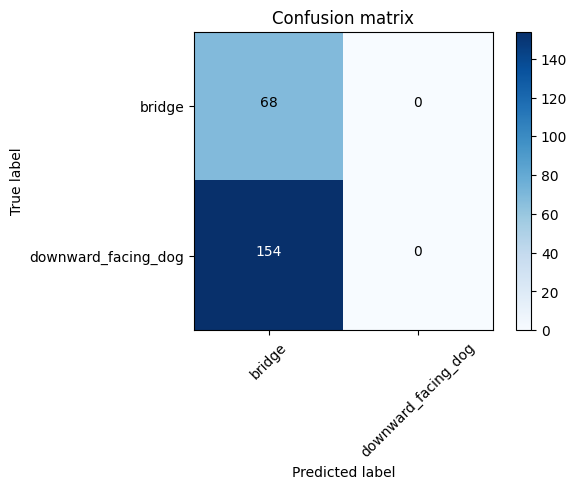

val Loss: 7.2923 Acc: 0.3063

Epoch 1/24
----------
train Loss: 0.4862 Acc: 0.8210
Confusion matrix, without normalization
[[ 68   0]
 [154   0]]


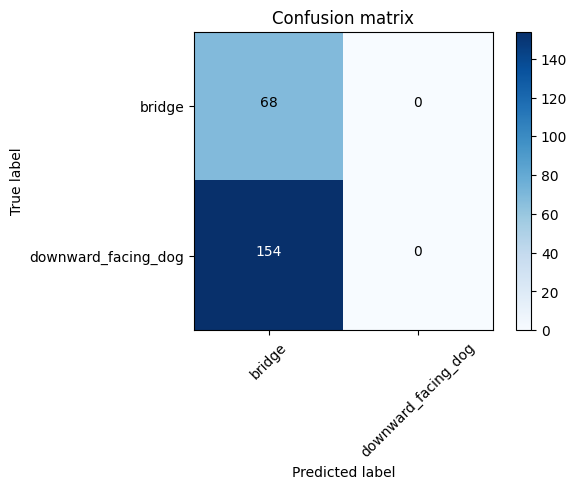

val Loss: 1.7429 Acc: 0.3063

Epoch 2/24
----------
train Loss: 0.4995 Acc: 0.8230
Confusion matrix, without normalization
[[ 68   0]
 [154   0]]


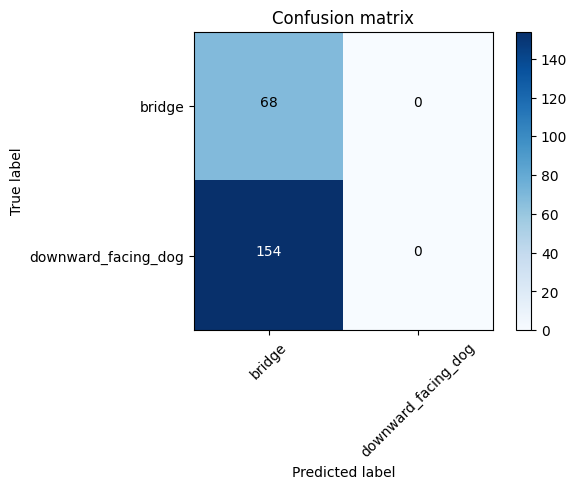

val Loss: 1.4050 Acc: 0.3063

Epoch 3/24
----------
train Loss: 0.4660 Acc: 0.8169
Confusion matrix, without normalization
[[ 68   0]
 [154   0]]


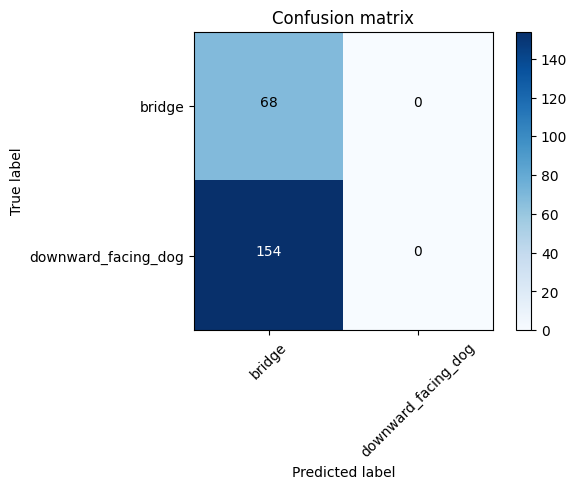

val Loss: 1.0416 Acc: 0.3063

Epoch 4/24
----------
train Loss: 0.4689 Acc: 0.8189
Confusion matrix, without normalization
[[ 49  19]
 [154   0]]


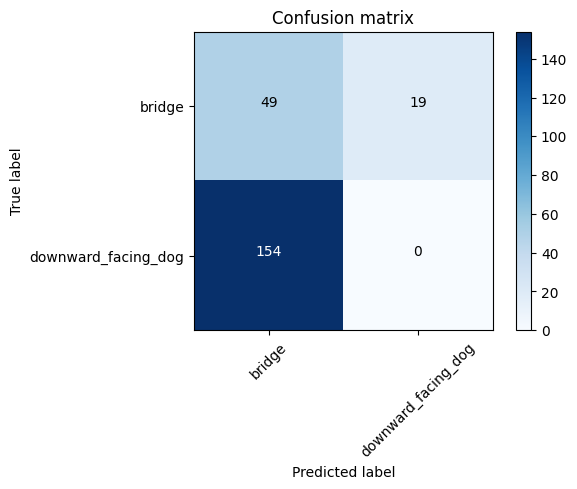

val Loss: 0.9363 Acc: 0.2207

Epoch 5/24
----------
train Loss: 0.4661 Acc: 0.8189
Confusion matrix, without normalization
[[ 68   0]
 [154   0]]


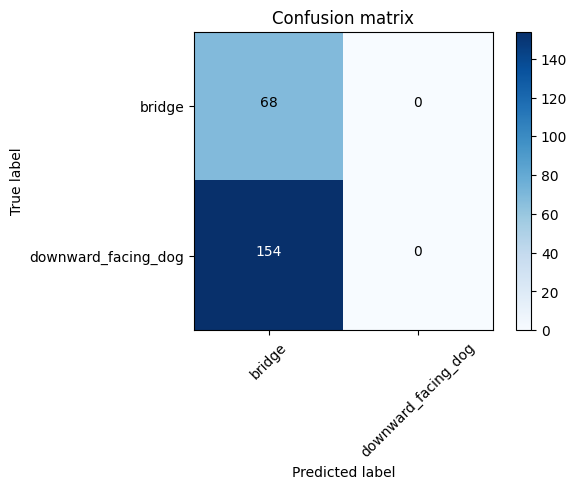

val Loss: 1.0626 Acc: 0.3063

Epoch 6/24
----------
train Loss: 0.4530 Acc: 0.8230
Confusion matrix, without normalization
[[ 46  22]
 [154   0]]


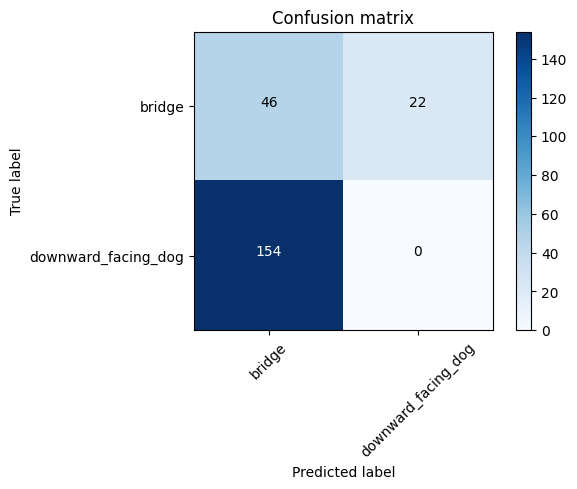

val Loss: 0.8641 Acc: 0.2072

Epoch 7/24
----------
train Loss: 0.4665 Acc: 0.8045
Confusion matrix, without normalization
[[ 68   0]
 [154   0]]


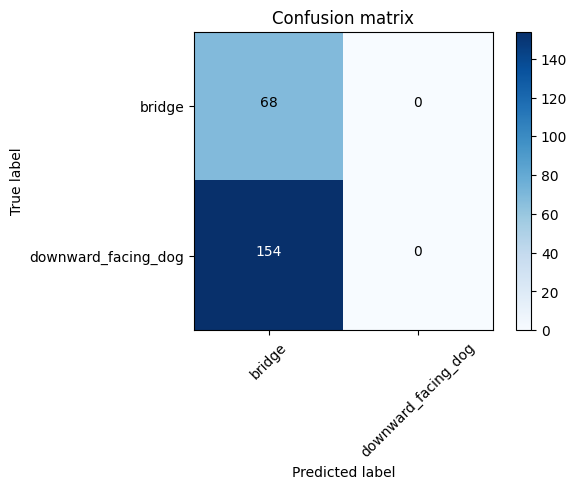

val Loss: 0.9947 Acc: 0.3063

Epoch 8/24
----------
train Loss: 0.4354 Acc: 0.8210
Confusion matrix, without normalization
[[ 68   0]
 [154   0]]


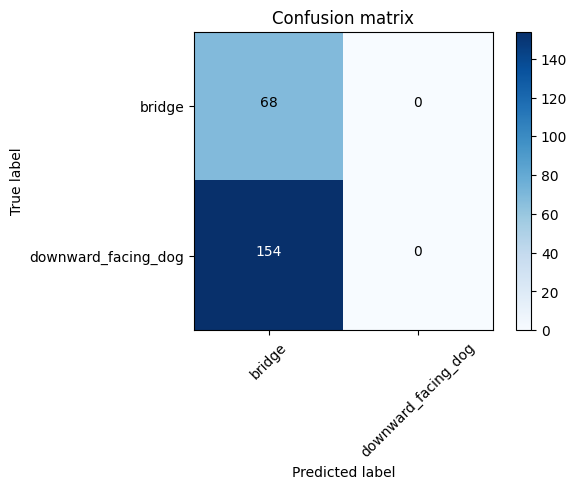

val Loss: 1.1295 Acc: 0.3063

Epoch 9/24
----------
train Loss: 0.4281 Acc: 0.8230
Confusion matrix, without normalization
[[ 68   0]
 [154   0]]


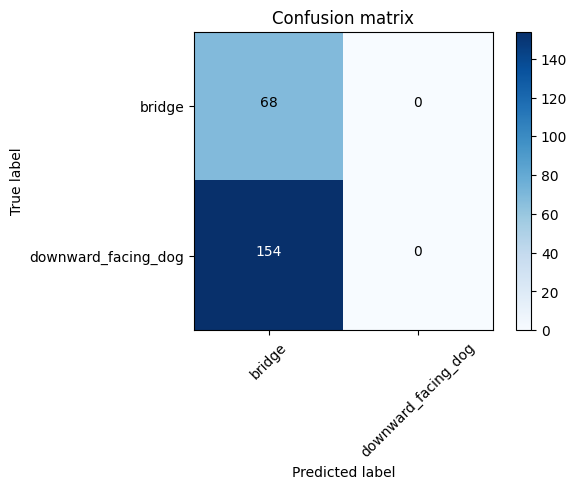

val Loss: 1.2169 Acc: 0.3063

Epoch 10/24
----------
train Loss: 0.4252 Acc: 0.8210
Confusion matrix, without normalization
[[ 68   0]
 [154   0]]


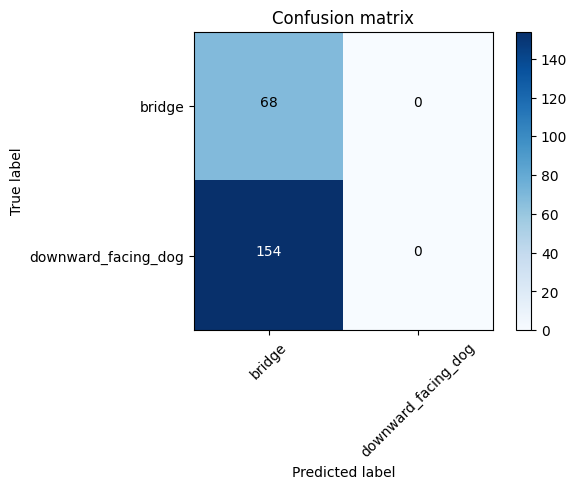

val Loss: 1.1203 Acc: 0.3063

Epoch 11/24
----------
train Loss: 0.4148 Acc: 0.8251
Confusion matrix, without normalization
[[ 68   0]
 [154   0]]


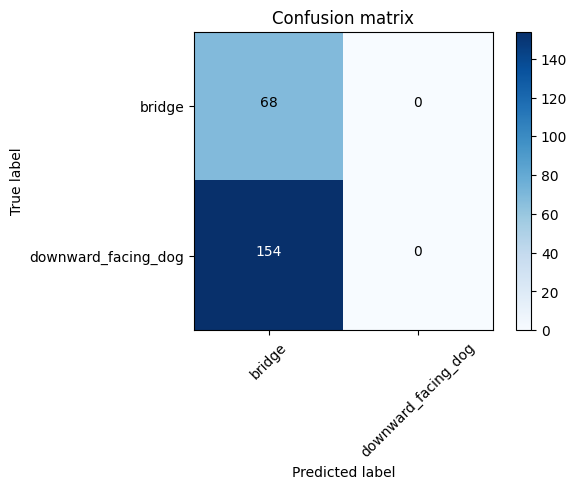

val Loss: 1.1369 Acc: 0.3063

Epoch 12/24
----------
train Loss: 0.4224 Acc: 0.8230
Confusion matrix, without normalization
[[ 68   0]
 [154   0]]


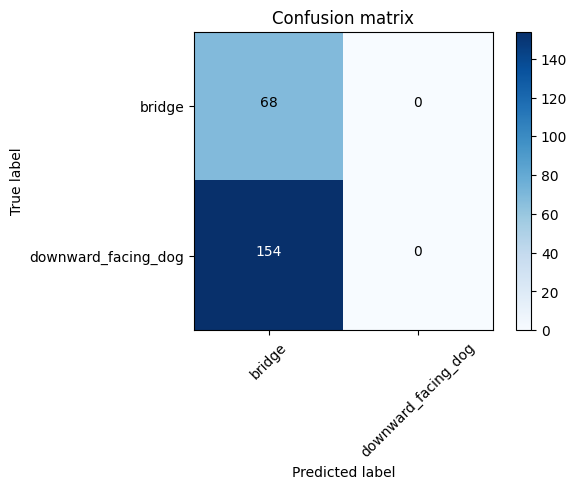

val Loss: 1.0685 Acc: 0.3063

Epoch 13/24
----------
train Loss: 0.4033 Acc: 0.8272
Confusion matrix, without normalization
[[ 68   0]
 [154   0]]


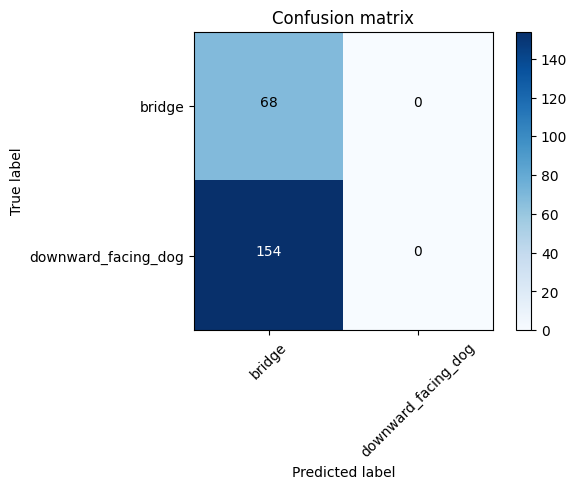

val Loss: 1.0770 Acc: 0.3063

Epoch 14/24
----------
train Loss: 0.4076 Acc: 0.8354
Confusion matrix, without normalization
[[ 68   0]
 [154   0]]


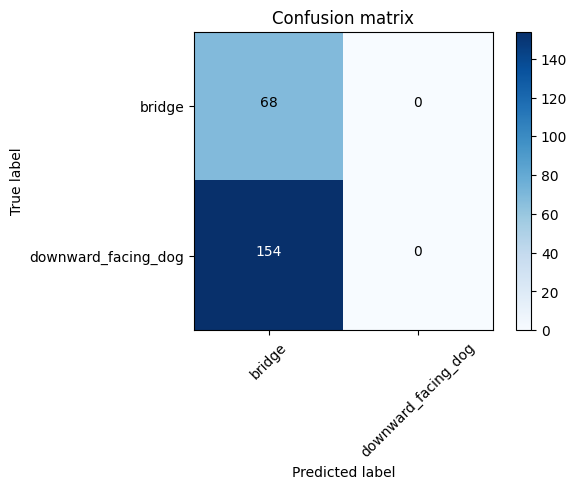

val Loss: 1.0667 Acc: 0.3063

Epoch 15/24
----------
train Loss: 0.4107 Acc: 0.8251
Confusion matrix, without normalization
[[ 68   0]
 [154   0]]


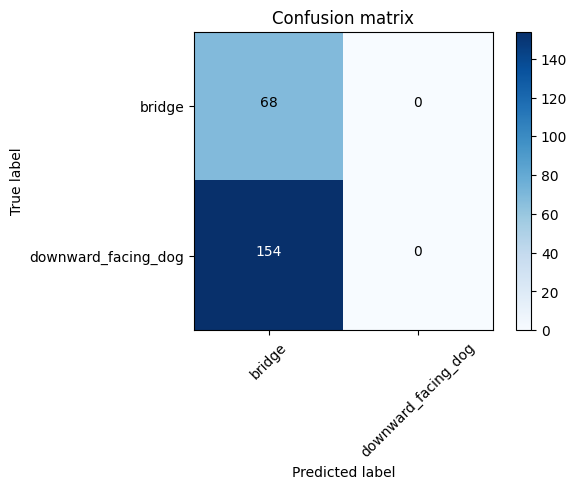

val Loss: 1.0750 Acc: 0.3063

Epoch 16/24
----------
train Loss: 0.4116 Acc: 0.8251
Confusion matrix, without normalization
[[ 68   0]
 [154   0]]


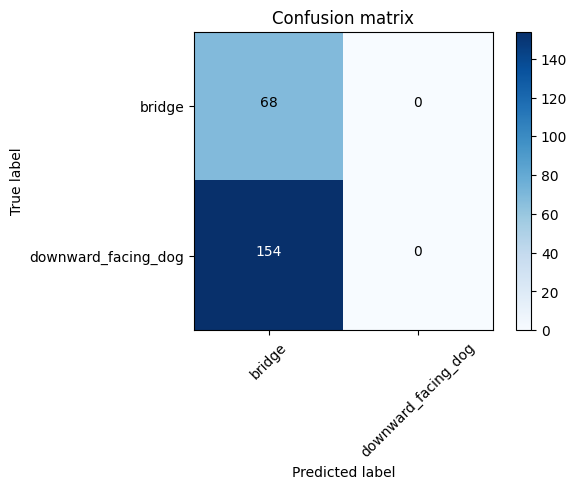

val Loss: 1.0933 Acc: 0.3063

Epoch 17/24
----------
train Loss: 0.4112 Acc: 0.8333
Confusion matrix, without normalization
[[ 68   0]
 [154   0]]


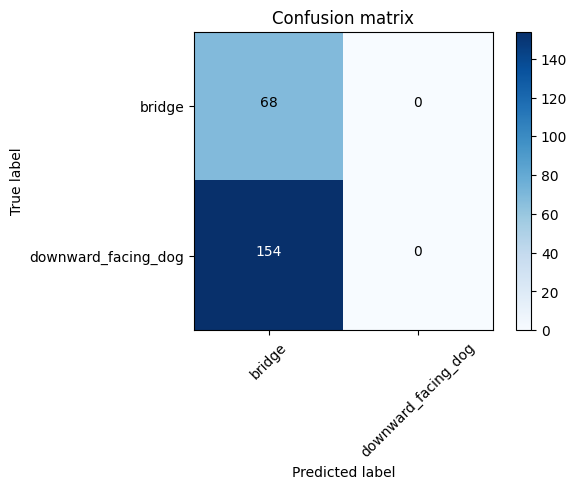

val Loss: 1.0993 Acc: 0.3063

Epoch 18/24
----------
train Loss: 0.4223 Acc: 0.8210
Confusion matrix, without normalization
[[ 68   0]
 [154   0]]


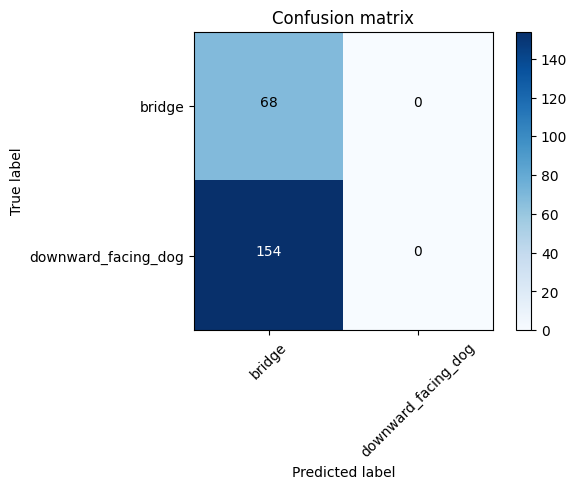

val Loss: 1.0827 Acc: 0.3063

Epoch 19/24
----------
train Loss: 0.4054 Acc: 0.8292
Confusion matrix, without normalization
[[ 68   0]
 [154   0]]


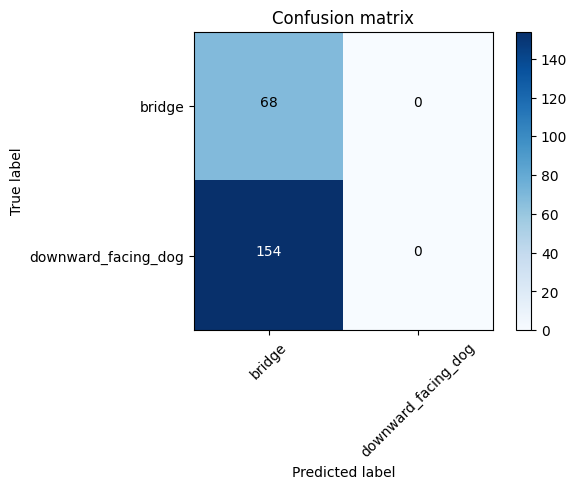

val Loss: 1.0639 Acc: 0.3063

Epoch 20/24
----------
train Loss: 0.4270 Acc: 0.8272
Confusion matrix, without normalization
[[ 68   0]
 [154   0]]


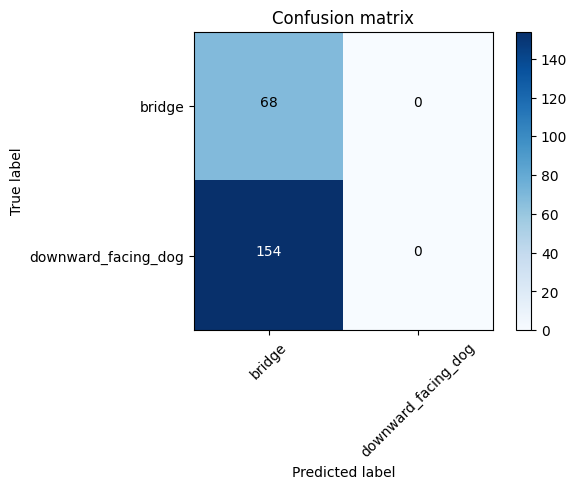

val Loss: 1.1063 Acc: 0.3063

Epoch 21/24
----------
train Loss: 0.4096 Acc: 0.8230
Confusion matrix, without normalization
[[ 68   0]
 [154   0]]


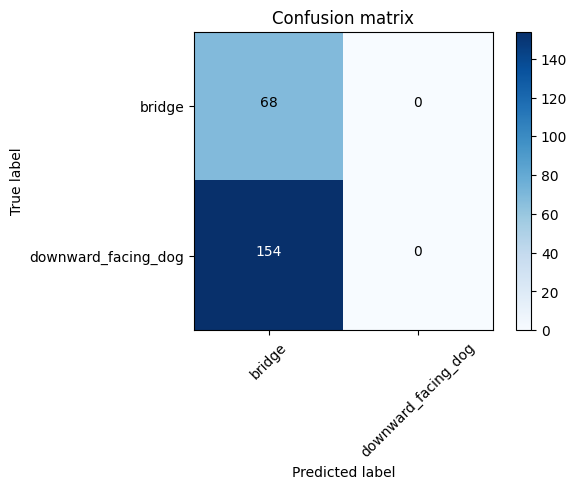

val Loss: 1.0698 Acc: 0.3063

Epoch 22/24
----------
train Loss: 0.4130 Acc: 0.8272
Confusion matrix, without normalization
[[ 68   0]
 [154   0]]


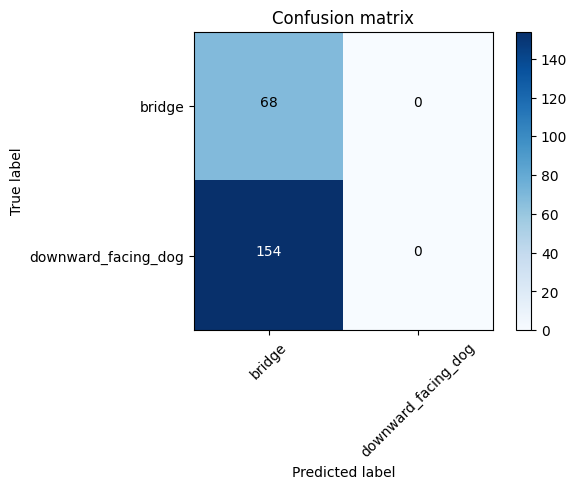

val Loss: 1.0707 Acc: 0.3063

Epoch 23/24
----------
train Loss: 0.4102 Acc: 0.8230
Confusion matrix, without normalization
[[ 68   0]
 [154   0]]


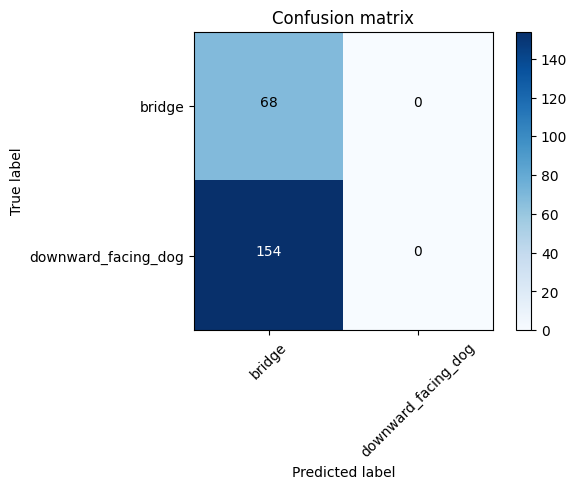

val Loss: 1.0542 Acc: 0.3063

Epoch 24/24
----------
train Loss: 0.3976 Acc: 0.8313
Confusion matrix, without normalization
[[ 68   0]
 [154   0]]


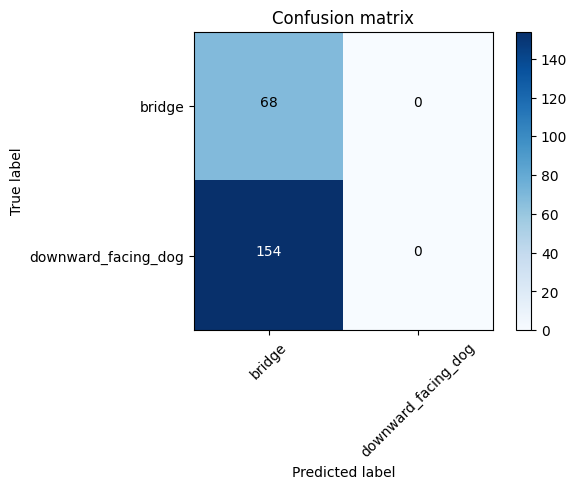

val Loss: 1.1079 Acc: 0.3063



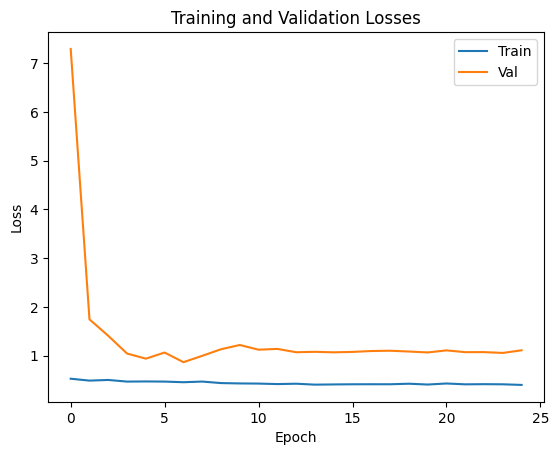

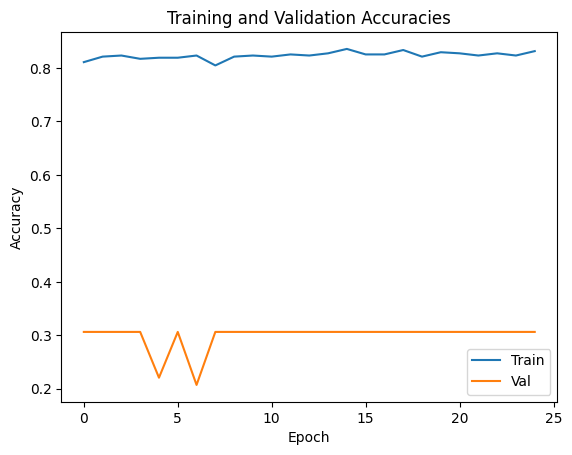

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    train_losses = []
    train_accs = []
    val_losses = []
    val_accs = []
    for epoch in range(num_epochs):
        print(f'Epoch {epoch}/{num_epochs - 1}')
        print('-' * 10)
        
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()
            else:
                model.eval()
            
            running_loss = 0.0
            running_corrects = 0
            all_labels = []
            all_preds = []
            
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)
                
                optimizer.zero_grad()
                
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    
                    if isinstance(outputs, InceptionOutputs):
                        outputs = outputs.logits  # Access the primary output tensor
                        
                    loss = criterion(outputs, labels)
                    
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()
                
                _, preds = torch.max(outputs, 1)
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
                all_labels.extend(labels.cpu().numpy())
                all_preds.extend(preds.cpu().numpy())
            
            if phase == 'train':
                scheduler.step()
                
                train_losses.append(running_loss / dataset_sizes[phase])
                train_accs.append(running_corrects.double() / dataset_sizes[phase])
            else:
                val_losses.append(running_loss / dataset_sizes[phase])
                val_accs.append(running_corrects.double() / dataset_sizes[phase])
                cm = confusion_matrix(all_labels, all_preds)
                plt.figure()
                plot_confusion_matrix(cm, classes=class_names, title='Confusion matrix')
                plt.show()
            
            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]
            
            print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')
        
        print()
    
  
    plt.figure()
    plt.plot(train_losses, label='Train')
    plt.plot(val_losses, label='Val')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Training and Validation Losses')
    plt.show()
    
    plt.figure()
    plt.plot(train_accs, label='Train')
    plt.plot(val_accs, label='Val')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Training and Validation Accuracies')
    plt.show()
    
    return model


model = train_model(model, criterion, optimizer, scheduler, num_epochs=25)


In [7]:
torch.save(model.state_dict(), 'C:/Users/20109/OneDrive/Desktop/New-Coach/model.pth')